In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.utils import np_utils
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 10)

Using TensorFlow backend.


In [2]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
# 60000張圖 28X28 pixel的圖片
# 將數值標準化
# reshape 讓他從 32 * 32 變成 784 * 1 的一維陣列
# 除以 255 讓我們標準化到 0-1 區間
x_train_shaped = x_train.reshape(60000, 784).astype("float32") / 255
x_test_shaped = x_test.reshape(10000, 784).astype("float32") / 255
# keras 要求你的分類輸出必須換成 One-hot 模式
y_train_cat = np_utils.to_categorical(y_train)
y_test_cat = np_utils.to_categorical(y_test)
# print("One-hot 前:", y_train[0])
# print("One-hot 後:", y_train_cat[0])

In [3]:
# # display result
# a = int(input("請輸入你想可視化的圖片 [0-59999]:"))
# print("你想可視化的圖片號碼是", a)
# print("圖片答案是", y_train[a])
# plt.imshow(x_train[a],cmap='gray')

In [4]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
# 中間層
h_layer = Dense(units = 256,input_dim = 784,kernel_initializer = "random_normal",activation = "relu")
model.add(h_layer)
# 輸出數字為 0~9
o_layer = Dense(units = 10,kernel_initializer = "random_normal",activation = "softmax")
model.add(o_layer)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [5]:
#  optimizer 先選 adam
model.compile(loss="categorical_crossentropy",optimizer = "adam", metrics = ['accuracy'])
train_history = model.fit(x = x_train_shaped, y = y_train_cat, 
                          validation_split = 0.1, epochs = 10, 
                          batch_size = 400,verbose = 2)


Train on 54000 samples, validate on 6000 samples
Epoch 1/10
 - 1s - loss: 0.5349 - acc: 0.8629 - val_loss: 0.2217 - val_acc: 0.9377
Epoch 2/10
 - 1s - loss: 0.2318 - acc: 0.9348 - val_loss: 0.1637 - val_acc: 0.9568
Epoch 3/10
 - 1s - loss: 0.1724 - acc: 0.9511 - val_loss: 0.1303 - val_acc: 0.9647
Epoch 4/10
 - 1s - loss: 0.1369 - acc: 0.9616 - val_loss: 0.1112 - val_acc: 0.9692
Epoch 5/10
 - 1s - loss: 0.1111 - acc: 0.9684 - val_loss: 0.1010 - val_acc: 0.9732
Epoch 6/10
 - 1s - loss: 0.0919 - acc: 0.9744 - val_loss: 0.0924 - val_acc: 0.9737
Epoch 7/10
 - 1s - loss: 0.0783 - acc: 0.9784 - val_loss: 0.0841 - val_acc: 0.9747
Epoch 8/10
 - 1s - loss: 0.0676 - acc: 0.9814 - val_loss: 0.0823 - val_acc: 0.9762
Epoch 9/10
 - 1s - loss: 0.0581 - acc: 0.9842 - val_loss: 0.0784 - val_acc: 0.9765
Epoch 10/10
 - 1s - loss: 0.0503 - acc: 0.9869 - val_loss: 0.0765 - val_acc: 0.9782


預測標籤: [7, 2, 1, 0, 4]
正確標籤: [7, 2, 1, 0, 4]
10000/10000 [==============================] - 0s 14us/step
衡量係數: [0.07698322105710395, 0.9766]
正確率: 97.66 %


,0,1,2,3,4,5,6,7,8,9
0,970,0,1,1,1,0,4,1,2,0
1,0,1124,3,1,0,1,2,0,4,0
2,5,2,1007,2,2,0,2,7,5,0
3,0,0,4,991,0,1,1,4,5,4
4,0,0,5,1,959,0,4,1,1,11
5,2,1,0,9,1,864,7,1,5,2
6,7,2,1,1,2,3,940,0,2,0
7,1,7,10,5,0,0,0,996,1,8
8,3,1,5,5,3,4,3,3,943,4
9,2,5,0,7,12,4,1,4,2,972


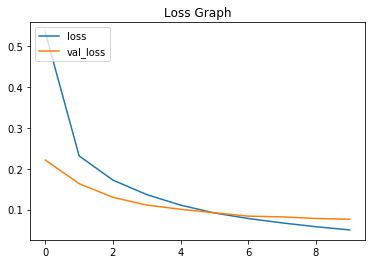

In [6]:
plt.plot(train_history.history["loss"])
plt.plot(train_history.history["val_loss"])
plt.title("Loss Graph")
plt.legend(['loss', 'val_loss'], loc="upper left")
pre = model.predict_classes(x_test_shaped)
print("預測標籤:", list(pre[:5]))
print("正確標籤:", list(y_test)[:5])
e = model.evaluate(x_test_shaped, y_test_cat)
print("衡量係數:", e)
print("正確率:", e[1] * 100, "%")
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, pre))